In [1]:
# import the relevant libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Preprocessing before modelling

In [2]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,2,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,1,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,1,0,0,0,0,0,0,0,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,0,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Notes on cleaning
# =====================
# remove Ptif col
# Persistent = 1, Non-Persistent = -1
# object cols to be one hot encoded

In [4]:
subset = data.iloc[:,:20]

for col in subset.columns:
    print(col)
    print(subset[col].nunique())

Ptid
3424
Persistency_Flag
2
Gender
2
Race
4
Ethnicity
3
Region
5
Age_Bucket
4
Ntm_Speciality
7
Ntm_Specialist_Flag
2
Ntm_Speciality_Bucket
3
Gluco_Record_Prior_Ntm
2
Gluco_Record_During_Rx
2
Dexa_Freq_During_Rx
58
Dexa_During_Rx
2
Frag_Frac_Prior_Ntm
2
Frag_Frac_During_Rx
2
Risk_Segment_Prior_Ntm
2
Tscore_Bucket_Prior_Ntm
2
Tscore_Bucket_During_Rx
2
Adherent_Flag
2


In [5]:
data.drop('Ptid', axis=1, inplace=True)
data['Persistency_Flag'].replace({'Persistent': 1, 'Non-Persistent': -1}, inplace=True)
data = pd.get_dummies(data)

data.head()

,Persistency_Flag,Age_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,...,Ntm_Speciality_OTHER,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_Unknown,Ntm_Specialist_Flag_Others,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Ntm_Speciality_Bucket_Rheum,Adherent_Flag_Adherent,Adherent_Flag_Non-Adherent
0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,-1,2,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
2,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,-1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,-1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [6]:
data.dtypes

Persistency_Flag                                   int64
Age_Bucket                                         int64
Gluco_Record_Prior_Ntm                             int64
Gluco_Record_During_Rx                             int64
Dexa_Freq_During_Rx                                int64
                                                   ...  
Ntm_Speciality_Bucket_Endo/Onc/Uro                 uint8
Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown    uint8
Ntm_Speciality_Bucket_Rheum                        uint8
Adherent_Flag_Adherent                             uint8
Adherent_Flag_Non-Adherent                         uint8
Length: 85, dtype: object

In [7]:
data['Persistency_Flag'].value_counts()

-1    2135
 1    1289
Name: Persistency_Flag, dtype: int64

In [8]:
data.shape

(3424, 85)

## Modelling

In [9]:
X = data.drop('Persistency_Flag', axis=1)
y = data['Persistency_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

In [10]:
# SVM linear
# ==============
model = SVC(kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [11]:
predictions = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy upon the test data is {100*accuracy:.2f} %')

Accuracy upon the test data is 84.00 %


In [13]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

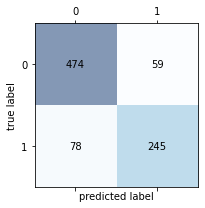

              precision    recall  f1-score   support

          -1       0.86      0.89      0.87       533
           1       0.81      0.76      0.78       323

    accuracy                           0.84       856
   macro avg       0.83      0.82      0.83       856
weighted avg       0.84      0.84      0.84       856



In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
confmat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confmat)
print(classification_report(y_test, predictions))

### Let´s do it with just 5 variables

In [15]:
data.columns

Index(['Persistency_Flag', 'Age_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Tscore_Bucket_During_Rx', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis

In [17]:
data1 = data[['Persistency_Flag', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx', 'Comorb_Long_Term_Current_Drug_Therapy',
'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms']]

In [18]:
X = data1.drop('Persistency_Flag', axis=1)
y = data1['Persistency_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=True)

In [19]:
model = SVC(kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=123)

In [20]:
predictions = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy upon the test data is {100*accuracy:.2f} %')

Accuracy upon the test data is 78.27 %


In [40]:
prueba = X_test.iloc[0] # Primera fila

In [41]:
prueba

Dexa_Freq_During_Rx                                                0
Dexa_During_Rx                                                     0
Comorb_Long_Term_Current_Drug_Therapy                              0
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx    0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms             0
Name: 2543, dtype: int64

In [42]:
type(prueba)

pandas.core.series.Series

In [43]:
#convertir a array
pred_arr = np.array(prueba)

In [48]:
preds = pred_arr.reshape(1,-1)

In [45]:
pred_arr.shape

(5,)

In [49]:
preds.shape

(1, 5)

In [51]:
result = model.predict(preds)

In [52]:
result

array([-1], dtype=int64)

In [54]:
import joblib
joblib.dump(model,'SVM_model.pkl')

['SVM_model.pkl']

In [56]:
pred_arr=np.array(prueba)
print(pred_arr)
preds=pred_arr.reshape(1,-1)
print(preds)
model=open("SVM_model.pkl","rb")
lr_model=joblib.load(model)
model_prediction=lr_model.predict(preds,)
print(model_prediction)

[0 0 0 0 0]
[[0 0 0 0 0]]
[-1]


In [71]:
dict1 = {-1:'Persistent', 1:'Non persistent'}

In [63]:
type(model_prediction)
#model_prediction[0]
#dict[model_prediction]

numpy.ndarray

In [64]:
model_prediction

array([-1], dtype=int64)

In [65]:
int_array = float_array.astype(model_prediction)

NameError: name 'float_array' is not defined

In [74]:
result1 = map(dict1, -1)
result1

TypeError: 'int' object is not iterable

In [75]:
model_prediction=round(float(model_prediction),2)

In [76]:
model_prediction

-1.0

In [82]:
dict1[model_prediction]

'Persistent'

In [80]:
result1

In [88]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Persistency_Flag,3424.0,-0.247079,0.969137,-1.0,-1.0,-1.0,1.0,1.0
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Dexa_During_Rx,3424.0,0.273364,0.445751,0.0,0.0,0.0,1.0,1.0
Comorb_Long_Term_Current_Drug_Therapy,3424.0,0.238610,0.426296,0.0,0.0,0.0,0.0,1.0
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",3424.0,0.394860,0.488892,0.0,0.0,0.0,1.0,1.0
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,3424.0,0.447722,0.497332,0.0,0.0,0.0,1.0,1.0


In [90]:
data1['Dexa_Freq_During_Rx'].unique()

array([  0,   2,   7,   3,   5,  20,  13,   1,   6,  12,   4,  10,  25,
        11,  18,  21,  15,  28,  22,  37,  14,   8,   9,  17,  81,  42,
        16,  30,  19,  45,  27,  24,  58,  26,  23,  33, 110,  36,  34,
        88,  66,  32, 118,  48,  69,  38,  40,  68,  52,  50, 146,  44,
        35,  39, 108,  54,  72,  29], dtype=int64)